# 산점도

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
target_df = pd.DataFrame(data=iris.target, columns=['target'])
target_df.head(3)

,target
0,0
1,0
2,0


In [5]:
target_df.loc[target_df['target'] == 0, 'target'] = 'setosa'
target_df.loc[target_df['target'] == 1, 'target'] = 'versicolor'
target_df.loc[target_df['target'] == 2, 'target'] = 'virginica'
target_df.head(3)

,target
0,setosa
1,setosa
2,setosa


In [6]:
df = pd.concat([iris_df, target_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

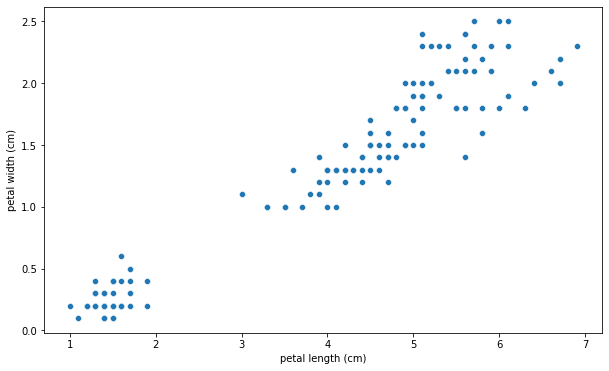

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)')

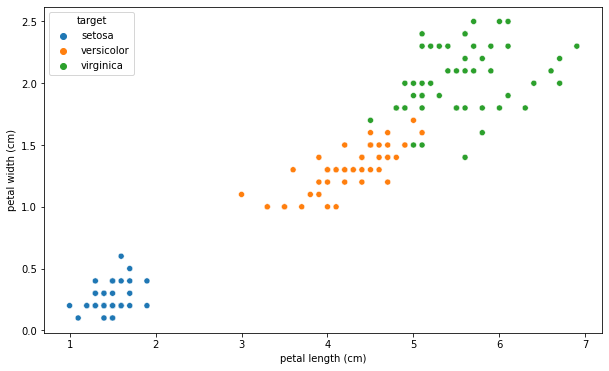

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')

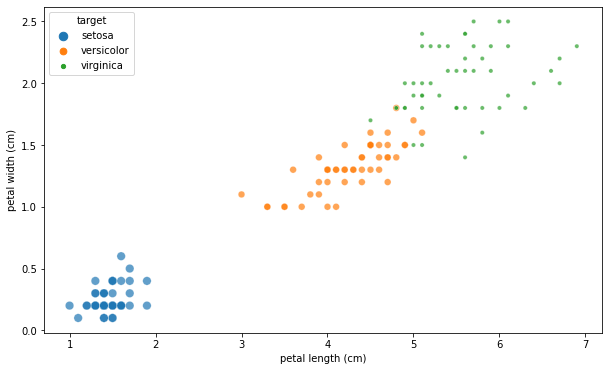

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', size='target', alpha=0.7)

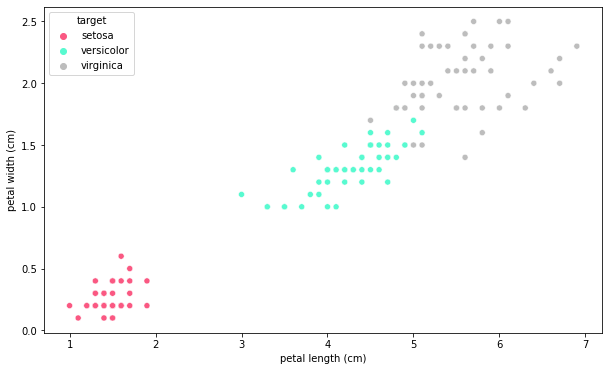

In [11]:
plt.figure(figsize=(10, 6))
sns.set_palette(['#FA5882', '#58FAD0', '#BDBDBD'])
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')

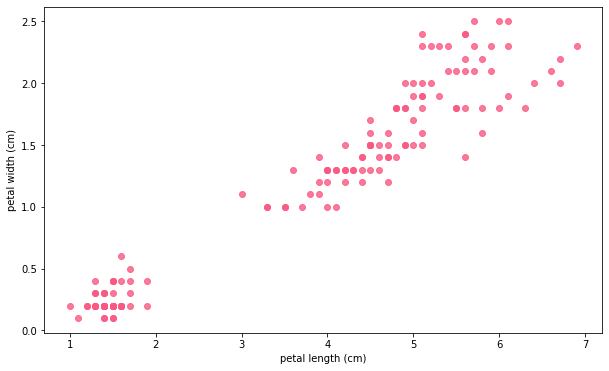

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=df['petal length (cm)'], y=df['petal width (cm)'], fit_reg=False)

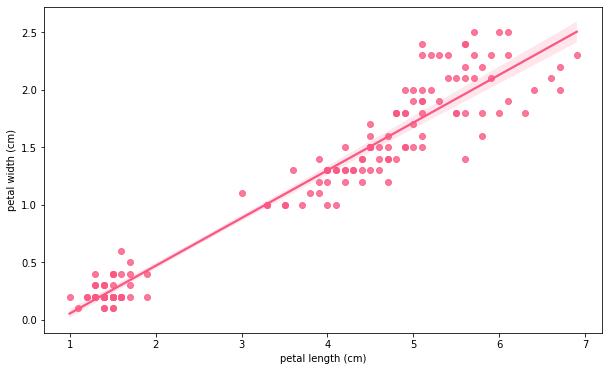

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=df['petal length (cm)'], y=df['petal width (cm)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<Figure size 1080x648 with 0 Axes>

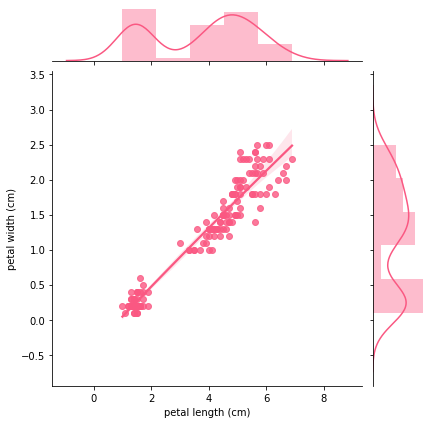

In [15]:
plt.figure(figsize=(15, 9))

jg = sns.JointGrid(x=df['petal length (cm)'], y=df['petal width (cm)'], data=df)  
jg.plot_joint(sns.regplot, order=2)
jg.plot_marginals(sns.distplot)